# Gradient in _K_ with migration, allele frequency variation

In these simulations, we imposed a gradient in carrying capacity across the matrix, with rural population being the largest and urban the smallest. All populations were initialized at carrying capacity. We performed simulations under 3 migration rates: 0, 0.01, 0.05. Simulations varried the initial frequency of both dominant alleles (i.e. _CYP79D15_ and _Li_) in the starting rural population. The parameter combinations were as follows (all varied parameters crossed factorially, total simulations = 27): 

* Number of simulations: 1000
* Number of generations: 500
* Max Creation probability: NA
* Bottleneck proportion: NA
* pA and pB: [0.1; 0.5; 0.9] and [0.1; 0.5; 0.9]
* Migration rate: [0; 0.01; 0.05]
* Maximum _K_ (rural): 1000
* Minimum _K_ (urban): 10

In [1]:
library(plyr)
library(ggplot2)
library(data.table)
library(Rmisc)
library(dplyr)

Loading required package: lattice

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Working directory for datasets varying migration rate and bottleneck proportion 
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/allFill_Kvary_AlleleFreq')

# Dataset for mean slope and proportions by parameter combination
MeansProps <- fread('20171218_MeansProps_allFill_Kvary_AlleleFreq.csv', header = T)
MeansProps$AlleleFreqs <- paste(MeansProps$pA_start, MeansProps$pB_start, sep = "-")
MeansProps$AlleleFreqs <- as.factor(as.character(MeansProps$AlleleFreqs))
MeansProps$AlleleFreqs <- factor(MeansProps$AlleleFreqs, levels=c("0.1-0.1", "0.1-0.5", "0.5-0.1", "0.1-0.9", 
                                                                "0.9-0.1", "0.5-0.5", "0.5-0.9", "0.9-0.5", 
                                                                "0.9-0.9"))
MeansProps$Mig_rate = as.factor(as.character(MeansProps$Mig_rate))
MeansProps$prop_sigPos[MeansProps$prop_sigPos == 1.000] <- 0.0

# datRegSummary <- fread("20171218_RegSummary_allFill_Kvary_AlleleFreq.csv")
# datRegSummary$AlleleFreqs <- paste(datRegSummary$pA_start, datRegSummary$pB_start, sep = "-")
# datRegSummary$AlleleFreqs <- as.factor(as.character(datRegSummary$AlleleFreqs))
# datRegSummary$AlleleFreqs <- factor(datRegSummary$AlleleFreqs, levels=c("0.1-0.1", "0.1-0.5", "0.5-0.1", "0.1-0.9", 
#                                                                 "0.9-0.1", "0.5-0.5", "0.5-0.9", "0.9-0.5", 
#                                                                 "0.9-0.9"))
# datRegSummary$Mig_rate = as.factor(as.character(datRegSummary$Mig_rate))

In [3]:
#Data subsets
MeansProps_Gen250 <- subset(MeansProps, seq == "250")
MeansProps_NoMig <- subset(MeansProps, Mig_rate == "0")
MeansProps_NoMig_Gen250 <- subset(MeansProps, seq == "250" & Mig_rate == "0")

In [4]:
MeansProps_Gen250

Mig_rate,pA_start,pB_start,seq,mean,sd,n,se,ci_mean,prop_sigPos,⋯,ci_pos,se_sigPos,ci_sigPos,prop_sigNeg,prop_neg,se_neg,ci_neg,se_sigNeg,ci_sigNeg,AlleleFreqs
0,0.1,0.1,250,0.0004591722,0.0012270519,1000,3.880279e-05,7.605347e-05,0.105,⋯,0.02627972,0.00969407,0.01900038,0.000,0.233,0.01336828,0.02620184,0.0000000000,0.000000000,0.1-0.1
0,0.1,0.5,250,0.0018302420,0.0026117199,1000,8.258984e-05,1.618761e-04,0.155,⋯,0.02579996,0.01144443,0.02243108,0.002,0.223,0.01316324,0.02579996,0.0014127986,0.002769085,0.1-0.5
0,0.1,0.9,250,0.0022265239,0.0034796540,1000,1.100363e-04,2.156712e-04,0.133,⋯,0.02708426,0.01073830,0.02104706,0.003,0.257,0.01381850,0.02708426,0.0017294508,0.003389724,0.1-0.9
0,0.5,0.1,250,0.0020185390,0.0026322075,1000,8.323771e-05,1.631459e-04,0.159,⋯,0.02483862,0.01156369,0.02266484,0.001,0.201,0.01267277,0.02483862,0.0009994999,0.001959020,0.5-0.1
0,0.5,0.5,250,0.0063694285,0.0048378845,1000,1.529873e-04,2.998552e-04,0.305,⋯,0.01817365,0.01455936,0.02853635,0.000,0.095,0.00927227,0.01817365,0.0000000000,0.000000000,0.5-0.5
0,0.5,0.9,250,0.0057075832,0.0052852004,1000,1.671327e-04,3.275801e-04,0.222,⋯,0.02157060,0.01314215,0.02575861,0.001,0.141,0.01100541,0.02157060,0.0009994999,0.001959020,0.5-0.9
0,0.9,0.1,250,0.0020109291,0.0034892153,1000,1.103387e-04,2.162638e-04,0.108,⋯,0.02767524,0.00981509,0.01923758,0.005,0.275,0.01412002,0.02767524,0.0022304708,0.004371723,0.9-0.1
0,0.9,0.5,250,0.0057822240,0.0053196548,1000,1.682223e-04,3.297156e-04,0.235,⋯,0.02124626,0.01340802,0.02627972,0.004,0.136,0.01083993,0.02124626,0.0019959960,0.003912152,0.9-0.5
0,0.9,0.9,250,0.0034551858,0.0034967369,1000,1.105765e-04,2.167300e-04,0.156,⋯,0.02328196,0.01147449,0.02249001,0.010,0.170,0.01187855,0.02328196,0.0031464265,0.006166996,0.9-0.9
0.01,0.1,0.1,250,0.0004332579,0.0009593130,1000,3.033614e-05,5.945883e-05,0.241,⋯,0.02541992,0.01352476,0.02650852,0.001,0.214,0.01296935,0.02541992,0.0009994999,0.001959020,0.1-0.1


In [26]:
str(MeansProps)

Classes ‘data.table’ and 'data.frame':	13500 obs. of  22 variables:
 $ Mig_rate   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ pA_start   : num  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
 $ pB_start   : num  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...
 $ seq        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ mean       : num  7.61e-05 8.87e-05 9.68e-05 1.06e-04 1.22e-04 ...
 $ sd         : num  0 0.000226 0.000314 0.000386 0.000435 ...
 $ n          : int  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ se         : num  0.00 7.13e-06 9.92e-06 1.22e-05 1.38e-05 ...
 $ ci_mean    : num  0.00 1.40e-05 1.94e-05 2.39e-05 2.70e-05 ...
 $ prop_sigPos: num  1 0.242 0.221 0.221 0.24 0.222 0.233 0.234 0.234 0.23 ...
 $ prop_pos   : num  1 0.71 0.715 0.721 0.731 0.735 0.739 0.728 0.73 0.727 ...
 $ se_pos     : num  0 0.0143 0.0143 0.0142 0.014 ...
 $ ci_pos     : num  0 0.0281 0.028 0.0278 0.0275 ...
 $ se_sigPos  : num  0 0.0135 0.0131 0.0131 0.0135 ...
 $ ci_sigPos  : num  0 0.0265 0.0257 0.0257 0.0265

In [4]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=15,angle=45,hjust=1),
          axis.text.y=element_text(size=15),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

# Mean slope by allele frequencies and migration rate

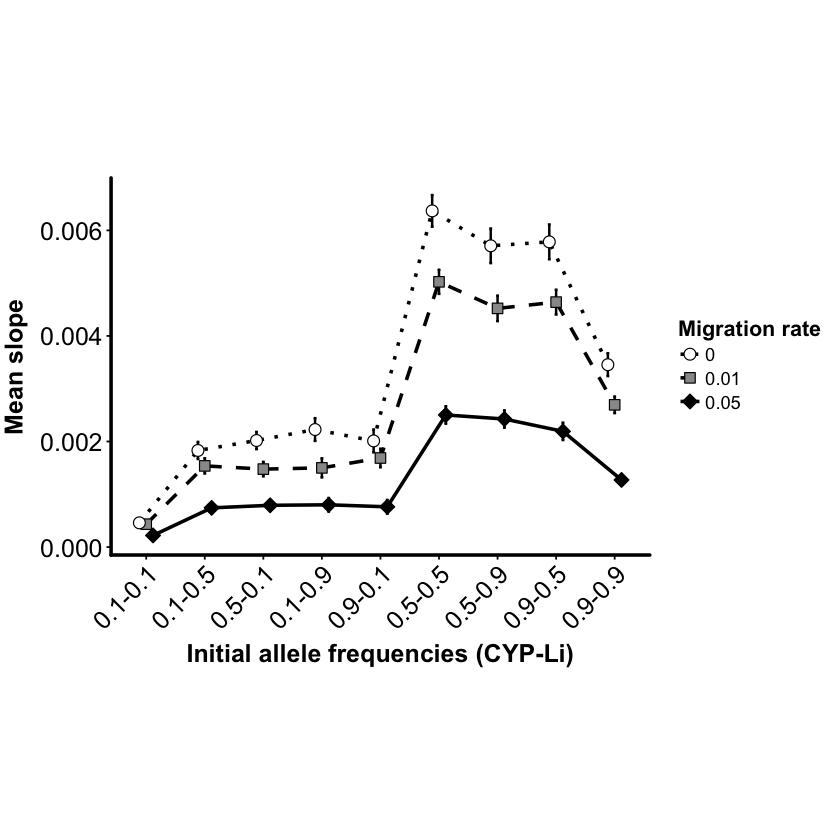

In [6]:
MeanSlope_AlleleFreq_Mig <- ggplot(MeansProps_Gen250, aes(x = factor(AlleleFreqs), y = mean, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.35)) +
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.35)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.35)) + 
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Mean slope") + xlab("Initial allele frequencies (CYP-Li)") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_AlleleFreq_Mig

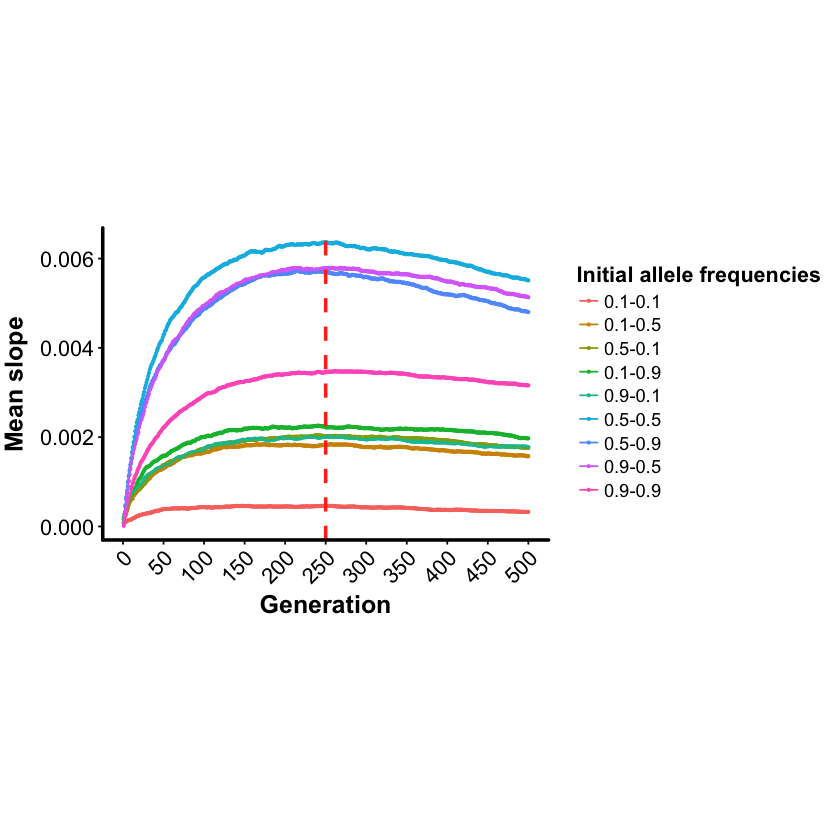

In [41]:
MeanSlope_byGen <- ggplot(MeansProps_NoMig, aes(x = seq, y = mean, group = AlleleFreqs, color = AlleleFreqs)) + 
    ylab("Mean slope") + xlab("Generation") + geom_point(size = 0.5, aes(color = AlleleFreqs)) +
    geom_line(size = 0.5, aes(color = AlleleFreqs)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Initial allele frequencies") + 
    geom_vline(data = Kvary_Mig_Summary_Cyan, xintercept = 250, size = 1, colour = "#FF3721", linetype = "dashed") + ng1.45
MeanSlope_byGen 

## Effects of allele frequencies on proportion of negative and positive clines

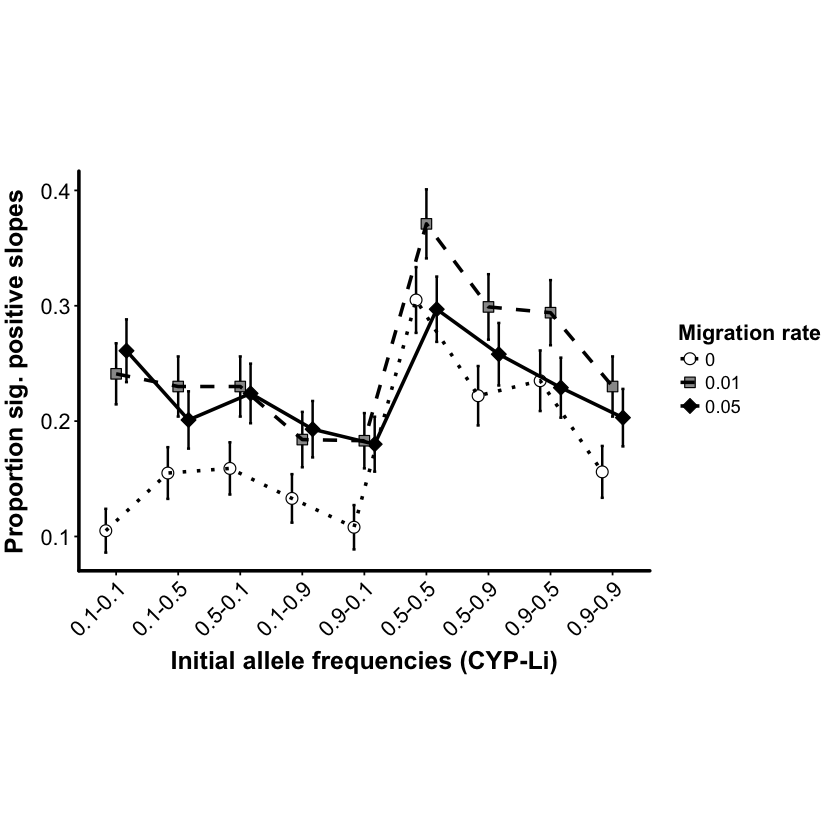

In [34]:
PropSigPos_AlleleFreq_Mig <- ggplot(MeansProps_Gen250, aes(x = factor(AlleleFreqs), y = prop_sigPos, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = prop_sigPos - ci_sigPos, ymax = prop_sigPos + ci_sigPos), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Proportion sig. positive slopes") + xlab("Initial allele frequencies (CYP-Li)") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
PropSigPos_AlleleFreq_Mig

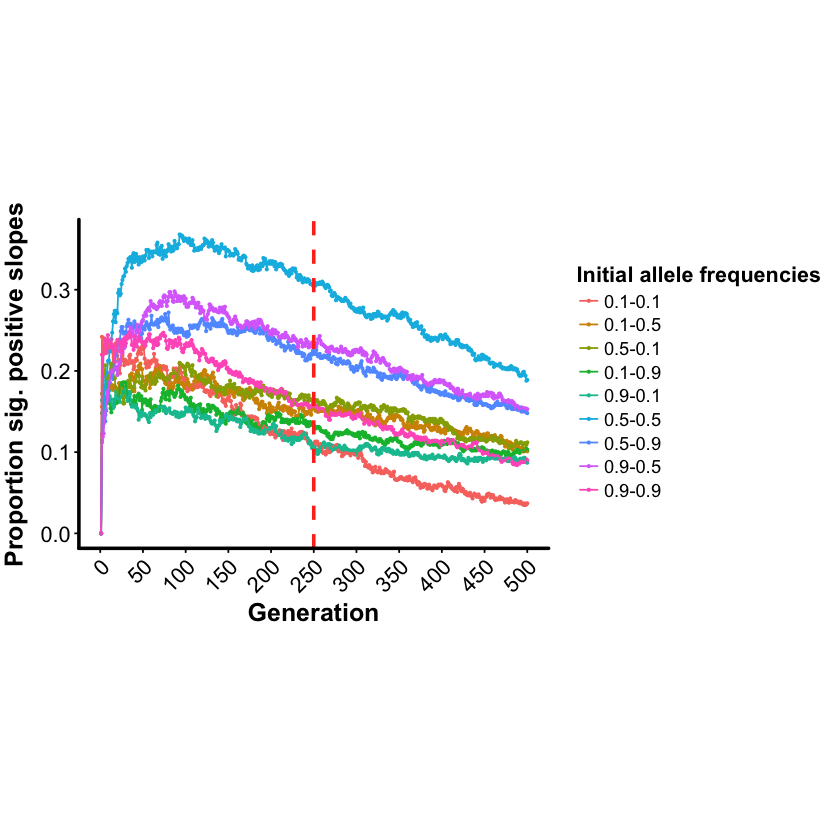

In [43]:
PropSigPos_byGen <- ggplot(MeansProps_NoMig, aes(x = seq, y = prop_sigPos, group = AlleleFreqs, color = AlleleFreqs)) + 
    ylab("Proportion sig. positive slopes") + xlab("Generation") + geom_point(size = 0.5, aes(color = AlleleFreqs)) +
    geom_line(size = 0.5, aes(color = AlleleFreqs)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Initial allele frequencies") + 
    geom_vline(data = Kvary_Mig_Summary_Cyan, xintercept = 250, size = 1, colour = "#FF3721", linetype = "dashed") + ng1.45
PropSigPos_byGen 

In [7]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
MeansProps_melt <- dplyr::select(MeansProps_NoMig_Gen250, AlleleFreqs, pA_start, pB_start, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(MeansProps_melt[,c("AlleleFreqs", "prop_sigPos", "ci_sigPos")], 
            id=c("AlleleFreqs", "ci_sigPos"))
dm2 <- melt(MeansProps_melt[,c("AlleleFreqs", "prop_sigNeg", "ci_sigNeg")], 
            id=c("AlleleFreqs", "ci_sigNeg"))

#Rename columns
setnames(dm1, old = c("ci_sigPos"), new = "ci")
setnames(dm2, old = c("ci_sigNeg"), new = "ci")

#Merge melted dataframes
MeansProps_melt <- rbind(dm1, dm2)
MeansProps_melt

AlleleFreqs,ci,variable,value
0.1-0.1,0.019000378,prop_sigPos,0.105
0.1-0.5,0.022431085,prop_sigPos,0.155
0.1-0.9,0.021047060,prop_sigPos,0.133
0.5-0.1,0.022664839,prop_sigPos,0.159
0.5-0.5,0.028536348,prop_sigPos,0.305
0.5-0.9,0.025758606,prop_sigPos,0.222
0.9-0.1,0.019237577,prop_sigPos,0.108
0.9-0.5,0.026279719,prop_sigPos,0.235
0.9-0.9,0.022490007,prop_sigPos,0.156
0.1-0.1,0.000000000,prop_sigNeg,0.000


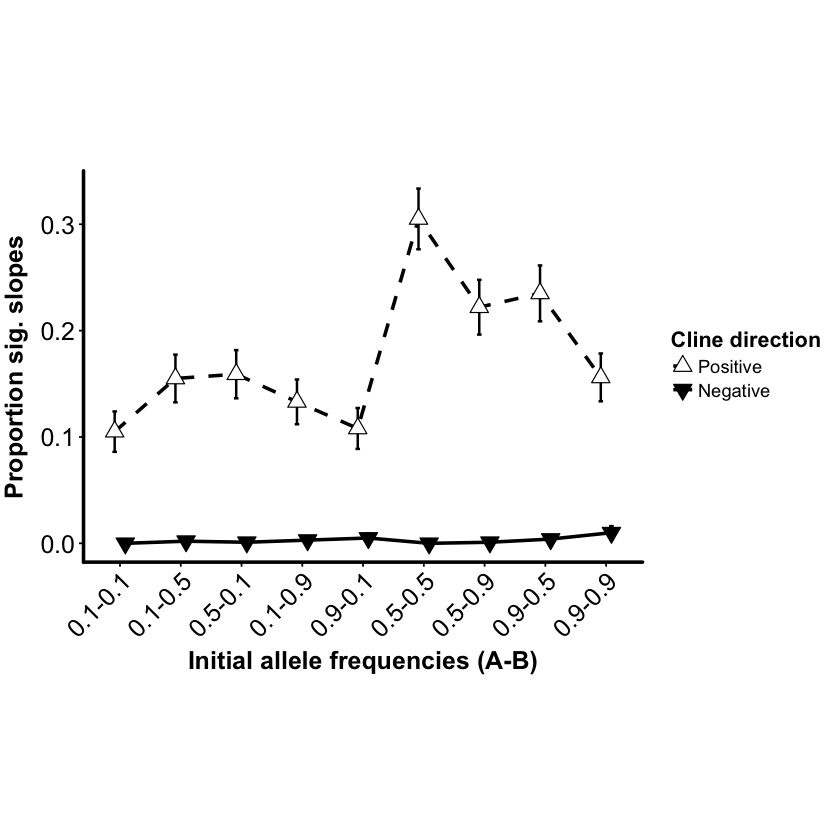

In [10]:
#Plot proportion of significant slopes by migration rate
PropSig_AlleleFreq_Dir <- ggplot(MeansProps_melt, aes(x = AlleleFreqs, y = value, 
    shape = variable, fill = variable, group = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, position = position_dodge(width = 0.35)) +
    ylab("Proportion sig. slopes") + xlab("Initial allele frequencies (A-B)") + 
    geom_line(size = 1, aes(linetype = variable), position = position_dodge(width = 0.35)) +
    geom_point(size = 3.5, color = "black", position = position_dodge(width = 0.35)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(24, 25))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    scale_linetype_manual(labels = c("Positive", "Negative"), values = c("dashed", "solid")) + 
    labs(shape = 'Cline direction', fill = 'Cline direction', linetype = "Cline direction") + ng1.45
PropSig_AlleleFreq_Dir

In [11]:
path = "~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Git/SEC_Figures"

MeanSlope_AlleleFreq_Mig_NoLeg = MeanSlope_AlleleFreq_Mig + theme(legend.position="none")
PropSig_AlleleFreq_Dir_NoLeg = PropSig_AlleleFreq_Dir + theme(legend.position="none")

ggsave("MeanSlope_AlleleFreq_Mig_NoLeg.pdf", plot = MeanSlope_AlleleFreq_Mig_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("PropSig_AlleleFreq_Dir_NoLeg.pdf", plot = PropSig_AlleleFreq_Dir_NoLeg, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
